In [47]:
from utils.heat_flow_utils import *
import matplotlib.pyplot as plt

"""
Default Parameters in IEEE Std 738TM-2012
"""
### 795 kcmil 26/7 Drake ACSR conductor
conductor = {'diameter': 28.1 / 1e3, # m
            'ref_temperature': 25, # °C
            'max_temperature': 90, # °C 
            'resistance_ratio': 0.00429, # om/°C
            'unit_resistance': 7.283 * 1e-5, # om/m 
            'conductor_angle': 0,
            'elevation': 100,
            }
### weather data (IEEE standard ):
weather = {'wind_speed':  0.61, # m/s
        'wind_angle': np.array([90]), # degree
        'air_density': 1.029, # kg/m^3
        'air_viscosity': 2.043*1e-5, # kg/m-s
        'air_conductivity': 0.02945, # W/m-°C
        'air_temperature': 30, # °C
        'radiation_emissivity': 0.8, 
        'solar_absorptivity': 0.8, 
        'solar_heat_intensity': 1000 # W/m^2
        }

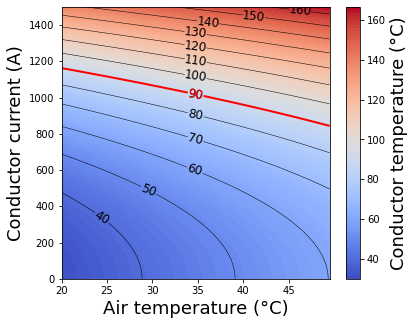

In [48]:
current_list = np.arange(0,1500,0.5)
tem_air_list = np.arange(20, 50,0.5)
tem_con_list = []
for tem_air in tem_air_list:
    weather['air_temperature'] = tem_air
    tem_con = heat_banlance_equation(current_list, conductor, weather)
    tem_con_list.append(tem_con)
tem_con_list = np.stack(tem_con_list, axis=1)


x, y = np.meshgrid(tem_air_list, current_list)
fig = plt.figure(figsize=[6, 5])
ax2 = fig.add_subplot(1, 1, 1) 
contourf = ax2.contourf(x, y, tem_con_list, 100, cmap='coolwarm')
explicit_levels = np.arange(0, 200, 10)  # Adjust the levels as needed
contour = ax2.contour(x, y, tem_con_list, levels=explicit_levels, colors='black', linewidths=0.5)

label_pos = []
for line in contour.collections:
    for path in line.get_paths():
        logvert = (path.vertices)
        mid_point = (path.vertices[:,0].max() + path.vertices[:,0].min())/2
        mid_index = np.argmin(np.abs(path.vertices[:,0] - mid_point))
        label_pos.append(logvert[mid_index,:])
ax2.clabel(contour, inline=True, fontsize=12, fmt="%1.0f",inline_spacing=3, rightside_up=True, manual=label_pos)

explicit_levels = [90]  # Adjust the levels as needed
contour = ax2.contour(x, y, tem_con_list, levels=[90], colors='red', linewidths=2)
label_pos = []
for line in contour.collections:
    for path in line.get_paths():
        logvert = (path.vertices)
        mid_point = (path.vertices[:,0].max() + path.vertices[:,0].min())/2
        mid_index = np.argmin(np.abs(path.vertices[:,0] - mid_point))
        label_pos.append(logvert[mid_index,:])
ax2.clabel(contour, inline=True, fontsize=12, fmt="%1.0f", inline_spacing=3, rightside_up=True, manual=label_pos)

cbar = fig.colorbar(contourf, ax=ax2)
cbar.set_ticks(np.arange(40,170,20))

cbar.set_label('Conductor temperature (°C)',  fontsize=18)
ax2.set_xlabel('Air temperature (°C)', fontsize=18)
ax2.set_ylabel('Conductor current (A)', fontsize=18)
plt.savefig('../tem_air_current.png', dpi=300)

/Users/liangenming/opt/anaconda3/envs/lem_app/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'line_widths'


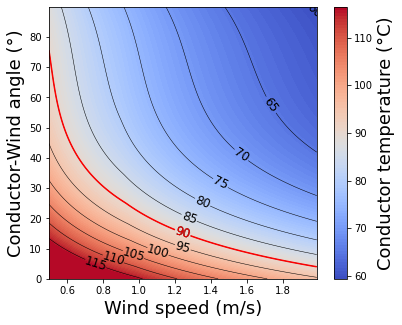

In [49]:
wind_speed_list = np.arange(0.5, 2, 0.01)
angle_diff_list = np.arange(0, 90, 0.1)
tem_con_list = []
current = 1000
weather['wind_angle'] = angle_diff_list
weather['air_temperature'] = 30
for wind_speed in wind_speed_list:
    weather['wind_speed'] = wind_speed
    tem_con = heat_banlance_equation(current, conductor.copy(), weather.copy())
    tem_con_list.append(tem_con)
tem_con_list = np.stack(tem_con_list, axis=1)

# Assuming tem_air_list, current_list, and tem_con_list are defined
x, y = np.meshgrid(wind_speed_list, angle_diff_list)

# Second subplot - Contour plot
fig = plt.figure(figsize=[6, 5])
ax2 = fig.add_subplot(1, 1, 1)  # Second subplot in a 1x2 grid
contourf = ax2.contourf(x, y, tem_con_list, 100, cmap='coolwarm')
explicit_levels = np.arange(0, 120, 5)  # Adjust the levels as needed
contour = ax2.contour(x, y, tem_con_list, levels=explicit_levels, colors='black',linewidths=0.5)

label_pos = []
for line in contour.collections:
    for path in line.get_paths():
        logvert = (path.vertices)
        mid_point = (path.vertices[:,0].max() + path.vertices[:,0].min())/2
        mid_index = np.argmin(np.abs(path.vertices[:,0] - mid_point))
        label_pos.append(logvert[mid_index,:])
ax2.clabel(contour, inline=True, fontsize=12, fmt="%1.0f",inline_spacing=3, rightside_up=True, manual=label_pos)


explicit_levels = [90]  # Adjust the levels as needed
contour = ax2.contour(x, y, tem_con_list, levels=[90], colors='red', line_widths=2)
label_pos = []
for line in contour.collections:
    for path in line.get_paths():
        logvert = (path.vertices)
        mid_point = (path.vertices[:,0].max() + path.vertices[:,0].min())/2
        mid_index = np.argmin(np.abs(path.vertices[:,0] - mid_point))
        label_pos.append(logvert[mid_index,:])
ax2.clabel(contour, inline=True, fontsize=12, fmt="%1.0f", inline_spacing=3, rightside_up=True, manual=label_pos)

cbar = fig.colorbar(contourf, ax=ax2)
cbar.set_ticks(np.arange(60,120,10))

cbar.set_label('Conductor temperature (°C)',  fontsize=18)
ax2.set_xlabel('Wind speed (m/s)', fontsize=18)
ax2.set_ylabel('Conductor-Wind angle (°)', fontsize=18)

plt.savefig('../tem_wind_angle.png', dpi=300)


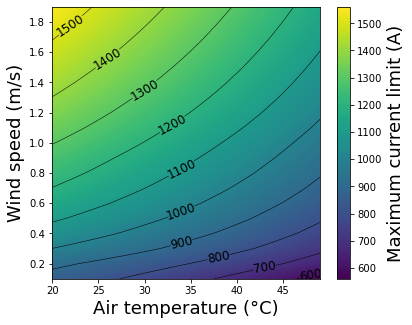

In [52]:
### weather data (IEEE standard ):
weather = {'wind_speed':  0.61, # m/s
        'wind_angle': np.array([90]), # degree
        'air_density': 1.029, # kg/m^3
        'air_viscosity': 2.043*1e-5, # kg/m-s
        'air_conductivity': 0.02945, # W/m-°C
        'air_temperature': 30, # °C
        'radiation_emissivity': 0.8, 
        'solar_absorptivity': 0.8, 
        'solar_heat_intensity': 1000 # W/m^2
        }
        
tem_air_list = np.arange(20, 50)
wind_speed_list = np.arange(0.1, 2, 0.1)
I_max_list = []
weather['wind_speed'] = wind_speed_list
for tem_air in tem_air_list:
    weather['air_temperature'] = tem_air
    Imax = maximum_allowable_current(conductor.copy(), weather.copy())
    I_max_list.append(Imax)
I_max_list = np.stack(I_max_list, axis=1)

# Assuming tem_air_list, current_list, and tem_con_list are defined
x, y = np.meshgrid(tem_air_list, wind_speed_list)

# Create a single figure for both plots
fig = plt.figure(figsize=[6, 5])  # Adjusted the width to accommodate both plots
# Second subplot - Contour plot
ax2 = fig.add_subplot(1, 1, 1)  # Second subplot in a 1x2 grid
contourf = ax2.contourf(x, y, I_max_list, 100)
explicit_levels = np.arange(0, 2000, 100)  # 50 evenly spaced levels
contour = ax2.contour(x, y, I_max_list, levels=explicit_levels, colors='black',linewidths=0.5)
label_pos = []
for line in contour.collections:
    for path in line.get_paths():
        logvert = (path.vertices)
        mid_point = (path.vertices[:,0].max() + path.vertices[:,0].min())/2
        mid_index = np.argmin(np.abs(path.vertices[:,0] - mid_point))
        label_pos.append(logvert[mid_index,:])
ax2.clabel(contour, inline=True, fontsize=12, fmt="%1.0f",inline_spacing=3, rightside_up=True, manual=label_pos)
cbar = fig.colorbar(contourf, ax=ax2)
cbar.set_ticks(np.arange(600, 1600, 100))

cbar.set_label('Maximum current limit (A)',  fontsize=18)
ax2.set_xlabel('Air temperature (°C)', fontsize=18)
ax2.set_ylabel('Wind speed (m/s)', fontsize=18)

plt.savefig('../current_wind_air.png', dpi=300)

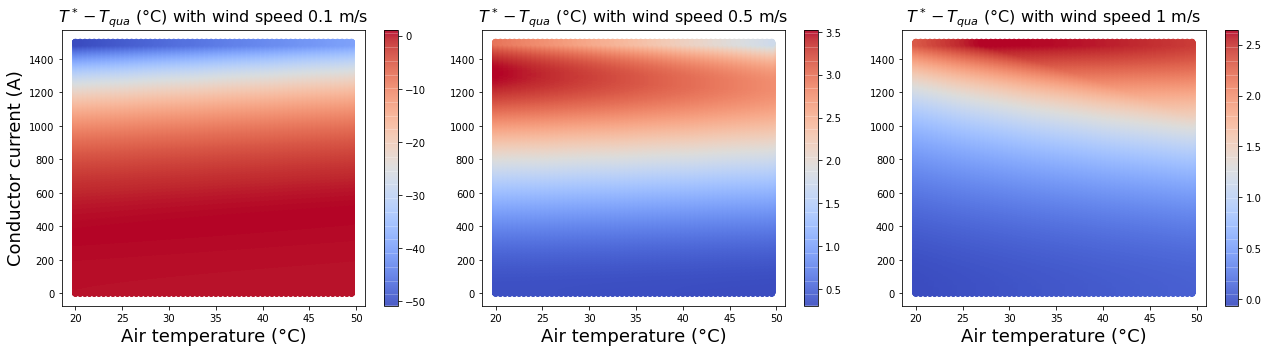

<Figure size 432x288 with 0 Axes>

In [61]:
### weather data (IEEE standard ):
weather = {'wind_speed':  0.61, # m/s
        'wind_angle': np.array([90]), # degree
        'air_density': 1.029, # kg/m^3
        'air_viscosity': 2.043*1e-5, # kg/m-s
        'air_conductivity': 0.02945, # W/m-°C
        'air_temperature': 30, # °C
        'radiation_emissivity': 0.8, 
        'solar_absorptivity': 0.8, 
        'solar_heat_intensity': 1000 # W/m^2
        }

# Assuming tem_air_list, current_list, and tem_con_list are defined
x, y = np.meshgrid(tem_air_list, current_list)

# # Create a single figure for both plots
fig = plt.figure(figsize=[6*3, 5])  # Adjusted the width to accommodate both plots

for i, wind in enumerate([0.1, 0.5, 1]):
    ### weather data (IEEE standard ):
    weather['wind_speed'] = wind
    current_list = np.arange(0,1500,0.5)
    tem_air_list = np.arange(20, 50,0.5)
    tem_con_list = []
    for tem_air in tem_air_list:
        weather['air_temperature'] = tem_air
        tem_con = heat_banlance_equation(current_list, conductor, weather)
        tem_con_list.append(tem_con)
    tem_con_list = np.stack(tem_con_list, axis=1)

    qua_tem_con_list = []
    for tem_air in tem_air_list:
        weather['air_temperature'] = tem_air
        tem_con = quadratic_heat_balance_approximation(current_list, conductor, weather)
        qua_tem_con_list.append(tem_con)
    qua_tem_con_list = np.stack(qua_tem_con_list, axis=1)
    wind = weather['wind_speed']

    plt.subplot(1,3,i+1)
    plt.scatter(x, y, c=(tem_con_list - qua_tem_con_list), cmap='coolwarm', alpha=0.7)
    plt.xlabel('Air temperature (°C)', fontsize=18)
    if i==0:
        plt.ylabel('Conductor current (A)', fontsize=18)
    plt.title(r'$T^* - T_{qua}$ (°C)'+f' with wind speed {wind} m/s', fontsize=16)
    # Show the plot
    plt.colorbar()
fig.tight_layout()
plt.show()
plt.savefig(f'models/quadratic_error_wind.png')